In [ ]:
# Importo librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [ ]:
# Dataset sacado de un ejemplo de código maquina

clientes = pd.DataFrame({"saldo" : [50000, 45000, 48000, 43500, 47000, 52000,
                                    20000, 26000, 25000, 23000, 21400, 18000,
                                    8000, 12000, 6000, 14500, 12600, 7000],

                         "transacciones": [25, 20, 16, 23, 25, 18,
                                           23, 22, 24, 21, 27, 18,
                                           8, 3, 6, 4, 9, 3]})

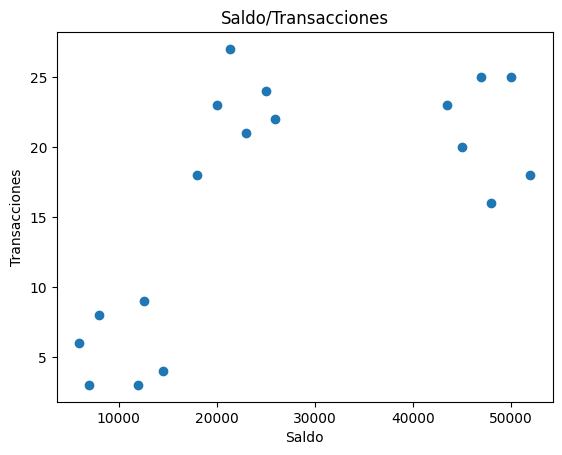

In [ ]:
# Gráfico los datos
plt.scatter(clientes.saldo, clientes.transacciones)
plt.xlabel("Saldo")
plt.ylabel("Transacciones")
plt.title("Saldo/Transacciones")
plt.show()

In [ ]:
# Normalizo y creo el objeto kmeans

escalador = MinMaxScaler().fit(clientes.values)
clientes = pd.DataFrame(escalador.transform(clientes.values),
                       columns=["saldo", "transacciones"])

kmeans = KMeans(n_clusters=9).fit(clientes.values)

clientes["cluster"] = kmeans.labels_

In [ ]:
clientes

,saldo,transacciones,cluster
0,0.956522,0.916667,4
1,0.847826,0.708333,8
2,0.913043,0.541667,2
3,0.815217,0.833333,4
4,0.891304,0.916667,4
5,1.000000,0.625000,2
6,0.304348,0.833333,3
7,0.434783,0.791667,3
8,0.413043,0.875000,3
9,0.369565,0.750000,3


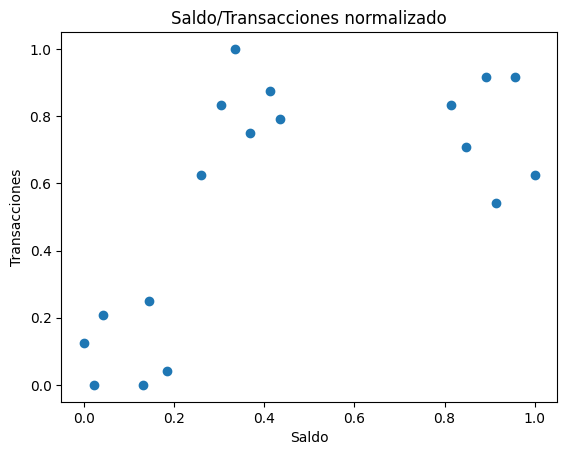

In [ ]:
plt.scatter(clientes.saldo, clientes.transacciones)
plt.xlabel("Saldo")
plt.ylabel("Transacciones")
plt.title("Saldo/Transacciones normalizado")
plt.show()

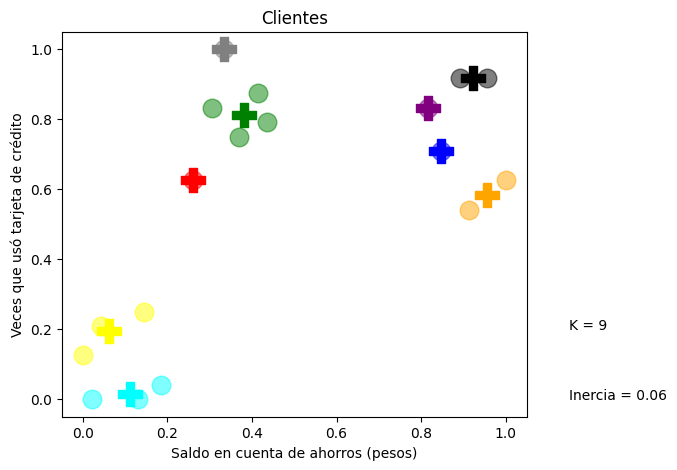

In [ ]:
# Gráfico con los clusters

plt.figure(figsize=(6, 5), dpi=100)

colores = ["red", "blue", "yellow", "green", "purple", "orange", "cyan", "black", "grey", "ligth green"]

for cluster in range(kmeans.n_clusters):
    plt.scatter(clientes[clientes["cluster"] == cluster]["saldo"],
                clientes[clientes["cluster"] == cluster]["transacciones"],
                marker="o", s=180, color=colores[cluster], alpha=0.5)

    plt.scatter(kmeans.cluster_centers_[cluster][0],
                kmeans.cluster_centers_[cluster][1],
                marker="P", s=280, color=colores[cluster])

plt.title("Clientes")
plt.xlabel("Saldo en cuenta de ahorros (pesos)")
plt.ylabel("Veces que usó tarjeta de crédito")
plt.text(1.15, 0.2, f"K = {kmeans.n_clusters}")
plt.text(1.15, 0, f"Inercia = {round(kmeans.inertia_, 2)}")
# plt.grid()
plt.show()

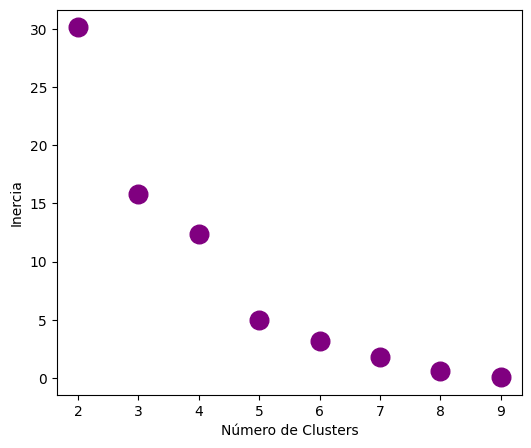

In [ ]:
# Método del codo:

inercias = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(clientes.values)
    inercias.append(kmeans.inertia_)

plt.figure(figsize=(6, 5), dpi=100)
plt.scatter(range(2, 10), inercias, marker="o", s=180, color="purple")
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")
plt.show()